# {ML vs My Mom - Housing Model}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem being addressed is the difficulty in accurately predicting home prices in the real estate markets. Homebuyers, sellers, and real estate professionals can benefit from a reliable and accurate model that provides an estimation of home prices based on historical sales and relevant attributes.

Zillow's Model Debacle that costed $500mm+:

https://insidebigdata.com/2021/12/13/the-500mm-debacle-at-zillow-offers-what-went-wrong-with-the-ai-models/

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Can a machine learning model predict home prices more accurately than a human with good real estate knowledge (my mom) of the area (Loveland, OH)?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The hypothesized answer is that the machine learning model, when trained on a comprehensive dataset of historical sales and relevant attributes, can provide more accurate predictions of home prices than a knowledgeable human, due to its ability to consider a larger number of variables and identify complex patterns in the data.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I will be scrapping Zillow and querying an API based on Redfin, relating the two on home address.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

1. Data Collection: Gather a comprehensive dataset of historical home sales in Loveland, OH, including property attributes (e.g., square footage, number of bedrooms, number of bathrooms, location, and other relevant factors).

2. Data Preprocessing & Exploratory Data Analysis: Clean and preprocess the data, handling missing values, outliers, and encoding categorical variables as needed. Examine and analyze the data to summarize the main characteristics and identify patterns, relationships, and anomalies.

3. Feature Engineering: Identify and create new features that may have predictive power, based on domain knowledge and exploratory data analysis.

4. Model Selection/Training/Evaluation: Test various machine learning algorithms (e.g., linear regression, decision trees, support vector machines, and neural networks) and select the one that provides the best performance, based on evaluation metrics like Mean Absolute Error (MAE) and R-squared. Train the selected model on the preprocessed dataset, tuning hyperparameters as needed to optimize performance. Evaluate the model's performance on a test dataset not used during training.

7. Testing and Results: Analyze the results, interpret the model's predictions, and validate the model's accuracy by comparing it with the human's predictions on a new set of properties not used during training. If the model demonstrates superior performance, the hypothesis will be supported.

# Data Collection
**I'm scrapping Zillow to get all the houses sold in the Loveland, OH (45140 Zip Code) area in the past year (4/7/2022 - 4/7/2023)**

**All the libraries I may be using**

In [308]:
import json
import time
import pandas as pd
import http.client
import numpy as np
from scipy.stats import skew, kurtosis
from redfin import Redfin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

**Making a request to Zillow to get the houses with the following fields that I've identified as meaningful. Some data may be missing for some of the fields which is why this looks complicated and convoluted**

In [2]:
statusType = []
soldPrice = []
unformattedPrice = []
address = []
addressStreet = []
addressCity = []
addressState = []
addressZipcode = []
beds = []
baths = []
area = []
isZillowOwned = []
variableData = []
hdpData = []
latitude = []
longitude = []
price = []
dateSold = []
homeType = []
homeStatus = []
zestimate = []
rentZestimate = []
priceForHDP = []
currency = []
country = []
taxAssessedValue = []
lotAreaValue = []
lotAreaUnit = []
brokerName = []

def getResponse(page):
  url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A{page}%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

  conn = http.client.HTTPSConnection("www.zillow.com")

  payload={}
  headers = {
    'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
  }

  conn.request("GET", url, payload, headers)
  res = conn.getresponse()
  data = res.read()
  data = data.decode("utf-8")
  json_obj = json.loads(data)
  return json_obj

def getData(json_obj):
  data = [x for x in json_obj["cat1"]["searchResults"]['listResults']]
      
  for d in data:
    statusType.append(d['statusType'] if 'statusType' in d else None)
    soldPrice.append(d['soldPrice'] if 'soldPrice' in d else None)
    unformattedPrice.append(d['unformattedPrice'] if 'unformattedPrice' in d else None)
    address.append(d['address'] if 'address' in d else None)
    addressStreet.append(d['addressStreet'] if 'addressStreet' in d else None)
    addressCity.append(d['addressCity'] if 'addressCity' in d else None)
    addressState.append(d['addressState'] if 'addressState' in d else None)
    addressZipcode.append(d['addressZipcode'] if 'addressZipcode' in d else None)
    beds.append(d['beds'] if 'beds' in d else None)
    baths.append(d['baths'] if 'baths' in d else None)
    area.append(d['area'] if 'area' in d else None)
    isZillowOwned.append(d['isZillowOwned'] if 'isZillowOwned' in d else None)
    variableData.append(d['variableData'] if 'variableData' in d else None)
    hdpData.append(d['hdpData'] if 'hdpData' in d else None)
    latitude.append(d['hdpData']['homeInfo']['latitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'latitude' in d['hdpData']['homeInfo'] else None)
    longitude.append(d['hdpData']['homeInfo']['longitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'longitude' in d['hdpData']['homeInfo'] else None)
    price.append(d['hdpData']['homeInfo']['price'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'price' in d['hdpData']['homeInfo'] else None)
    dateSold.append(d['hdpData']['homeInfo']['dateSold'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'dateSold' in d['hdpData']['homeInfo'] else None)
    homeType.append(d['hdpData']['homeInfo']['homeType'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeType' in d['hdpData']['homeInfo'] else None)
    homeStatus.append(d['hdpData']['homeInfo']['homeStatus'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeStatus' in d['hdpData']['homeInfo'] else None)
    zestimate.append(d['hdpData']['homeInfo']['zestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'zestimate' in d['hdpData']['homeInfo'] else None)
    rentZestimate.append(d['hdpData']['homeInfo']['rentZestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'rentZestimate' in d['hdpData']['homeInfo'] else None)  
    priceForHDP.append(d['hdpData']['homeInfo']['priceForHDP'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'priceForHDP' in d['hdpData']['homeInfo'] else None)
    currency.append(d['hdpData']['homeInfo']['currency'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'currency' in d['hdpData']['homeInfo'] else None)
    country.append(d['hdpData']['homeInfo']['country'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'country' in d['hdpData']['homeInfo'] else None)
    taxAssessedValue.append(d['hdpData']['homeInfo']['taxAssessedValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'taxAssessedValue' in d['hdpData']['homeInfo'] else None)
    lotAreaValue.append(d['hdpData']['homeInfo']['lotAreaValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaValue' in d['hdpData']['homeInfo'] else None)
    lotAreaUnit.append(d['hdpData']['homeInfo']['lotAreaUnit'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaUnit' in d['hdpData']['homeInfo'] else None)
    brokerName.append(d['brokerName'] if 'brokerName' in d else None)

**Multi-page response so let's make a request to see how many pages of data there will be**

In [3]:
url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A1%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

conn = http.client.HTTPSConnection("www.zillow.com")

payload={}
headers = {
'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
}

conn.request("GET", url, payload, headers)
res = conn.getresponse()
data = res.read()
data = data.decode("utf-8")
json_obj = json.loads(data)

total_pages = json_obj.get('cat1', dict()).get('searchList', dict()).get('totalPages')

print(total_pages)

20


**Zillow does not like scraping, so we need to set a time-out between requests (or we will be banned)**

In [4]:
for page in range(1, total_pages+1):
    json_obj = getResponse(page)
    getData(json_obj)
    time.sleep(100)

**Let's put our scraped data into a csv for future use**

In [5]:
holder = (list(zip(statusType,soldPrice,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,variableData,hdpData,latitude,longitude,price,dateSold,homeType,homeStatus,zestimate,rentZestimate,priceForHDP,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,brokerName)))
columns = ['statusType', 'soldPrice', 'unformattedPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths', 'area', 'isZillowOwned', 'variableData', 'hdpData', 'latitude', 'longitude', 'price', 'dateSold', 'homeType', 'homeStatus', 'zestimate', 'rentZestimate', 'priceForHDP', 'currency', 'country', 'taxAssessedValue', 'lotAreaValue', 'lotAreaUnit', 'brokerName']
houses = pd.DataFrame(holder, columns=columns)
houses.to_csv('houses.csv', index=False)

# Data Preprocessing & Exploratory Data Analysis

**Reading our csv into a dataframe with houses in the 45140 area code**

In [92]:
houses = pd.read_csv('houses.csv')
houses = houses[houses['addressZipcode'] == 45140]
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 799
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statusType        746 non-null    object 
 1   soldPrice         746 non-null    object 
 2   unformattedPrice  746 non-null    int64  
 3   address           746 non-null    object 
 4   addressStreet     746 non-null    object 
 5   addressCity       746 non-null    object 
 6   addressState      746 non-null    object 
 7   addressZipcode    746 non-null    int64  
 8   beds              679 non-null    float64
 9   baths             679 non-null    float64
 10  area              655 non-null    float64
 11  isZillowOwned     746 non-null    bool   
 12  variableData      746 non-null    object 
 13  hdpData           746 non-null    object 
 14  latitude          734 non-null    float64
 15  longitude         734 non-null    float64
 16  price             746 non-null    float64
 17  da

**Dropping some unuseful columns (either redundant or probably won't help our model)**

In [93]:
houses.drop(['statusType', 'soldPrice', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'isZillowOwned', 'variableData', 'hdpData', 'price', 'homeType', 'homeStatus', 'priceForHDP', 'currency', 'country', 'brokerName'], axis=1, inplace=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 799
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unformattedPrice  746 non-null    int64  
 1   address           746 non-null    object 
 2   beds              679 non-null    float64
 3   baths             679 non-null    float64
 4   area              655 non-null    float64
 5   latitude          734 non-null    float64
 6   longitude         734 non-null    float64
 7   dateSold          746 non-null    int64  
 8   zestimate         620 non-null    float64
 9   rentZestimate     713 non-null    float64
 10  taxAssessedValue  717 non-null    float64
 11  lotAreaValue      737 non-null    float64
 12  lotAreaUnit       737 non-null    object 
dtypes: float64(9), int64(2), object(2)
memory usage: 81.6+ KB


**Changing column names to make more sense**

In [94]:
houses.rename(columns={'unformattedPrice': 'price', 'area': 'sqft'}, inplace=True)
houses.head()

,price,address,beds,baths,sqft,latitude,longitude,dateSold,zestimate,rentZestimate,taxAssessedValue,lotAreaValue,lotAreaUnit
0,300000,"2887 Maureen Ct, Loveland, OH 45140",3.0000,2.0000,1269.0000,39.2993,-84.2749,1680850800000,275300.0000,1700.0000,183140.0000,8550.8280,sqft
1,218000,"218 Oneida Dr, Loveland, OH 45140",3.0000,1.0000,925.0000,39.2690,-84.2750,1680764400000,211000.0000,1749.0000,93270.0000,8059.0000,acres
2,535000,"1322 Bedfordshire Dr, Loveland, OH 45140",4.0000,4.0000,2914.0000,39.2212,-84.2327,1680678000000,546400.0000,3033.0000,293300.0000,0.6900,acres
3,850000,"1069 Oasis Point Dr, Loveland, OH 45140",4.0000,5.0000,5101.0000,39.2359,-84.2500,1680505200000,NaN,3999.0000,NaN,0.5620,acres
4,660300,"9848 Maineville Rd, Loveland, OH 45140",3.0000,2.0000,1880.0000,39.2891,-84.2443,1680159600000,660700.0000,2194.0000,336410.0000,4.2378,acres


**Some of the area values are in sqft and some are in acres, let's convert all of them to acres**

In [95]:
def convert_to_acres(row):
    if row['lotAreaUnit'] == 'sqft':
        return row['lotAreaValue'] / 43560
    else:
        return row['lotAreaValue']

houses['lotAreaValue'] = houses.apply(convert_to_acres, axis=1)

houses.drop(['lotAreaUnit'], axis=1, inplace=True)

**The price is what we're focused on, so let's take a further look at it**

In [96]:
print(houses['price'].describe())
print('Median: ', houses['price'].median())

count        746.0000
mean      421241.0040
std       519379.4611
min         1000.0000
25%       224250.0000
50%       340000.0000
75%       515750.0000
max     10326000.0000
Name: price, dtype: float64
Median:  340000.0


**Wow, a house sold for `$`10.3 million and one sold for only `$`1,000! Something isn't right, I did some digging and it looks like Zillow had some wrong data for some "houses". I checked the `$`10.3 million dollar "house" and it turns out it isn't a house. To negate issues at the higher end of the spectrum, I've decided to filter my dataset to prices under `$`5,000,000.**

I filtered by the zip code 45140 above so this house isn't in our dataframe but it is in the raw data; go ahead and check out the price ;) - https://www.zillow.com/homedetails/6091-2nd-St-Miamiville-OH-45147/2062599063_zpid/

In [97]:
houses = houses[(houses['price'] < 5000000)]
print(houses['price'].describe())
print('Median: ', houses['price'].median())

count       743.0000
mean     394777.6433
std      271608.7988
min        1000.0000
25%      224000.0000
50%      338000.0000
75%      515000.0000
max     3100000.0000
Name: price, dtype: float64
Median:  338000.0


**For the houses on the lower end of the price spectrum (like our $1,000 house), I found that either the data was wrong or the houses were complete trash (fixer-uppers if you will). So the cells below were used to help me determine an appropriate cutoff**

1st percentile:  15000.0
5th percentile:  85000.0
10th percentile:  149900.0


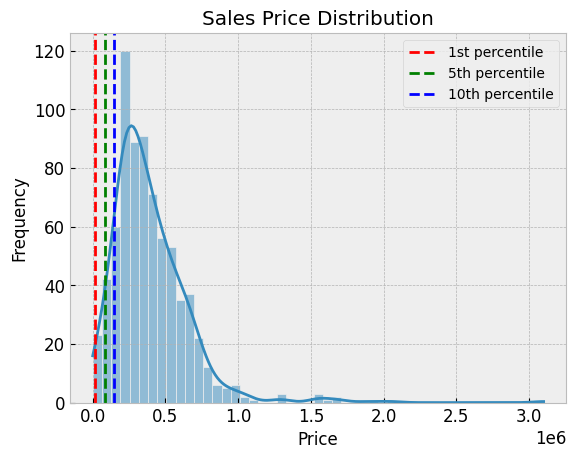

In [98]:
p1 = np.percentile(houses['price'], 1)
p5 = np.percentile(houses['price'], 5)
p10 = np.percentile(houses['price'], 10)

print('1st percentile: ', p1)
print('5th percentile: ', p5)
print('10th percentile: ', p10)

sns.histplot(data=houses, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')
plt.axvline(x=p1, color='red', linestyle='--', label='1st percentile')
plt.axvline(x=p5, color='green', linestyle='--', label='5th percentile')
plt.axvline(x=p10, color='blue', linestyle='--', label='10th percentile')
plt.legend()
plt.show()

**1st percentile: $15,000 - Choosing this value would retain 99% of the data, but the value still seems quite low for a home price.**
**5th percentile: $85,000 - This option retains 95% of the data and seems a little more reasonable as a minimum value for a house.**
**10th percentile: $149,900 - This choice retains 90% of the data and might be more representative of the lower end of the housing market.**

**Due to our fixer-upper dillema, I'm gonna go with $149,900 as our minimum value for price.**

In [99]:
houses = houses[(houses['price'] >= 149900)]

**Let's check out a histogram of the price again**

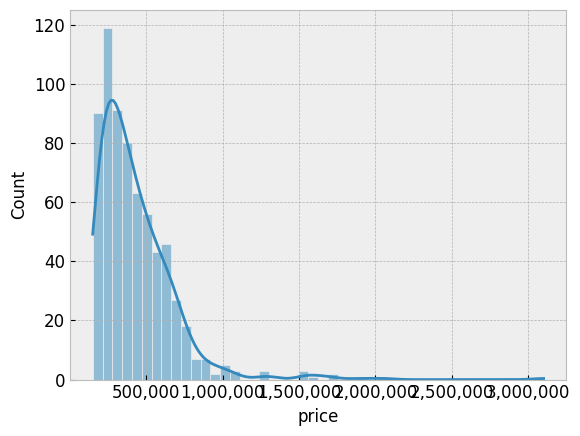

In [100]:
ax = sns.histplot(houses['price'], kde=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:,.0f}'.format))
plt.show()

**This looks better but it is still skewed to the right, let's look at this further**

In [101]:
print('Skewness: ', houses['price'].skew())
print('Kurtosis: ', houses['price'].kurt())

Skewness:  3.345242568755424
Kurtosis:  21.559143295158552


**We can normalize the price using a log transformation. This makes the data more symettryic and follow a normal-like distribution, helping reduce the impact of outliers, handle skewed data, and stabilize the variance across diffferent levels of the variable.**

Log Skewness:  0.4593365980223383
Log Kurtosis:  0.2061849900644699


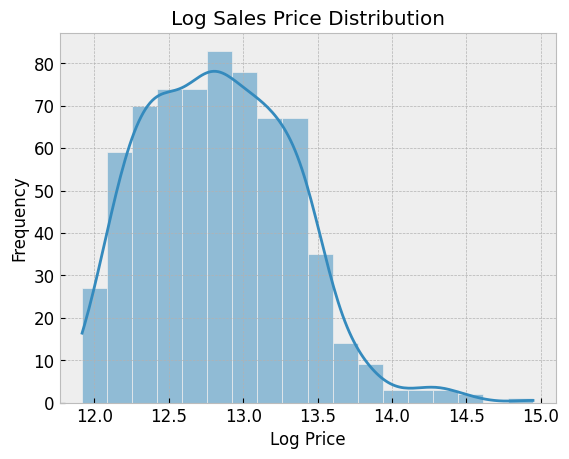

In [102]:
houses['log_price'] = np.log(houses['price'])

log_skewness = skew(houses['log_price'])
log_kurtosis = kurtosis(houses['log_price'])

print("Log Skewness: ", log_skewness)
print("Log Kurtosis: ", log_kurtosis)

sns.histplot(data=houses, x='log_price', kde=True)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log Sales Price Distribution')
plt.show()

**Let's start digging into some other stuff, let's make sure there are no duplicates.**

In [103]:
houses.duplicated().sum()

0

**Let's look at the correlation between the price and our features.**

In [104]:
# Dropping address in this df because it's not numeric
houses_without_address = houses.drop("address", axis=1)
houses_without_address.corr()['log_price'].sort_values(ascending=False)

log_price           1.0000
price               0.9127
zestimate           0.8542
sqft                0.7542
rentZestimate       0.7409
baths               0.7082
taxAssessedValue    0.6785
beds                0.5289
latitude            0.0604
lotAreaValue        0.0335
dateSold            0.0035
longitude          -0.1277
Name: log_price, dtype: float64

<Axes: >

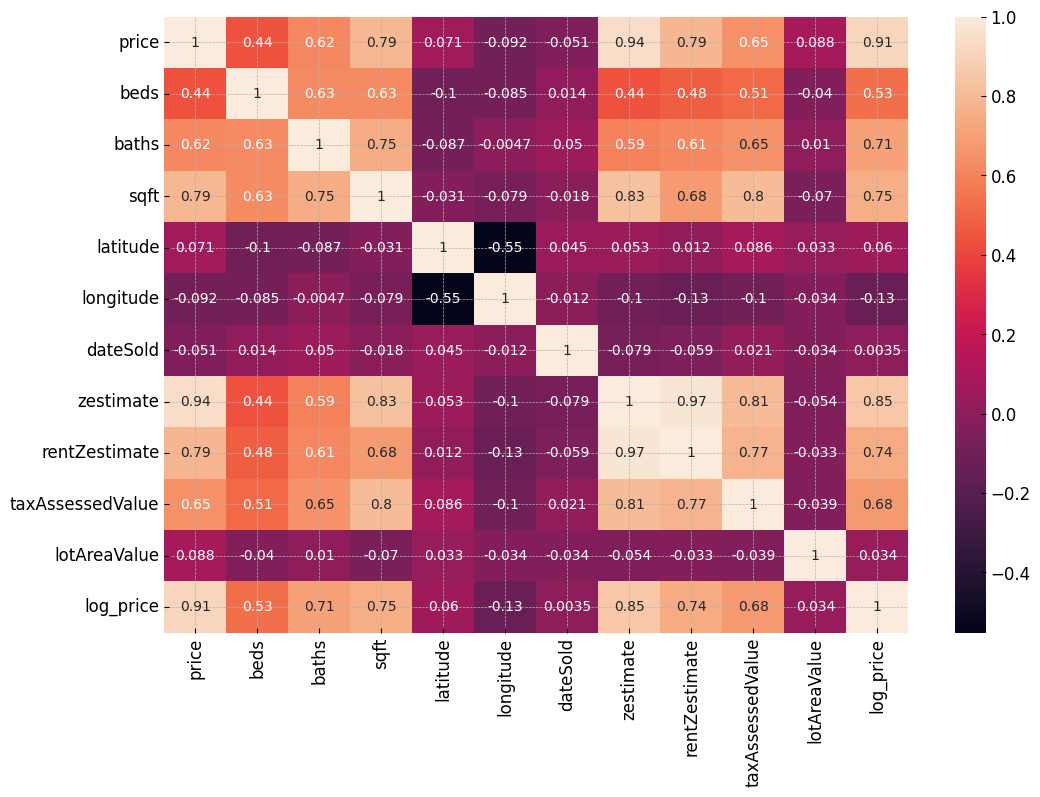

In [105]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(houses_without_address.corr(), annot=True, ax=ax)

**The Zillow estimates are highly correlated, however these are estimates/predictions themselves. I'd like to create a model that doesn't use another estimate/prediction system. Using them may improve the accuracy of my model, however these are current estimates and not estimates from when the house was sold. I may revisit this, still thinking through it. I'm going to drop the taxAssessedValue as well.**

In [106]:
houses.drop(['zestimate', 'rentZestimate', 'taxAssessedValue'], axis=1, inplace=True)

**The dateSold and the latitude/longitude weren't very correlated to the price. I'd like to use latitude and longititude in some way, may revisit later.**

In [107]:
houses.drop(['dateSold', 'latitude', 'longitude'], axis=1, inplace=True)

**I'm going to drop price to since we are using the log_price.**

In [108]:
houses.drop(['price'], axis=1, inplace=True)

**Lot's of good features here, however some of them have missing values. Let's figure out what to do with these.**

In [109]:
houses.isna().sum()

address          0
beds            40
baths           40
sqft            64
lotAreaValue     7
log_price        0
dtype: int64

**Option 1: Remove rows with missing values**

In [110]:
houses_clean = houses.dropna()

In [111]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 798
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       599 non-null    object 
 1   beds          599 non-null    float64
 2   baths         599 non-null    float64
 3   sqft          599 non-null    float64
 4   lotAreaValue  599 non-null    float64
 5   log_price     599 non-null    float64
dtypes: float64(5), object(1)
memory usage: 32.8+ KB


**Option 2: Fill in missing values**

In [112]:
houses_filled = houses.copy()
houses_filled['beds'].fillna(houses_filled['beds'].median(), inplace=True)
houses_filled['baths'].fillna(houses_filled['baths'].median(), inplace=True)
houses_filled['sqft'].fillna(houses_filled['sqft'].median(), inplace=True)
houses_filled['lotAreaValue'].fillna(houses_filled['lotAreaValue'].median(), inplace=True)

In [114]:
houses_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       669 non-null    object 
 1   beds          669 non-null    float64
 2   baths         669 non-null    float64
 3   sqft          669 non-null    float64
 4   lotAreaValue  669 non-null    float64
 5   log_price     669 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.6+ KB


**Let's go with option 2 and the filled records as it gives a lot more records**

In [115]:
houses_filled_without_address = houses_filled.drop("address", axis=1)
houses_filled_without_address.corr()['log_price'].sort_values(ascending=False)

log_price      1.0000
sqft           0.6626
baths          0.6563
beds           0.4722
lotAreaValue   0.0334
Name: log_price, dtype: float64

In [116]:
houses_filled.head(3)

,address,beds,baths,sqft,lotAreaValue,log_price
0,"2887 Maureen Ct, Loveland, OH 45140",3.0000,2.0000,1269.0000,0.1963,12.6115
1,"218 Oneida Dr, Loveland, OH 45140",3.0000,1.0000,925.0000,8059.0000,12.2923
2,"1322 Bedfordshire Dr, Loveland, OH 45140",4.0000,4.0000,2914.0000,0.6900,13.1900


**At this point, I am wondering if I could add any more features. Neighborhood data would be nice, but from the research I've done, I can't seem to find a viable way to put this in. With a lot more time, I would definitely add this location factor in, but for now, let's see if I can find any other aspects about our houses that could be meaningful.**

In [76]:
client = Redfin()

def get_amenities(address):
    try:
        search_response = client.search(address)
        if 'payload' in search_response and 'exactMatch' in search_response['payload']:
            url = search_response['payload']['exactMatch']['url']
            initial_info = client.initial_info(url)

            property_id = initial_info['payload']['propertyId']
            mls_data = client.below_the_fold(property_id)

            listing_id = initial_info['payload']['listingId']
            avm_details = client.avm_details(property_id, listing_id)

            data = mls_data

            amenity_info = data['payload']['amenitiesInfo']

            amenities = {}
            for super_group in amenity_info['superGroups']:
                for amenity_group in super_group['amenityGroups']:
                    group_title = amenity_group['groupTitle']
                    amenities[group_title] = {}
                    for amenity_entry in amenity_group['amenityEntries']:
                        if 'amenityName' in amenity_entry:
                            amenity_name = amenity_entry['amenityName']
                            amenity_values = amenity_entry['amenityValues']
                            amenities[group_title][amenity_name] = amenity_values
            return amenities
        else:
            print(f"Error fetching amenities for address: {address}")
            return {}
    except KeyError:
        print(f"Error fetching amenities for address: {address}")
        return {}

# Assuming 'houses_filled' is your DataFrame
for index, row in houses_filled.iterrows():
    address = row['address']
    amenities = get_amenities(address)
    
    # Add amenities to the DataFrame
    for group_title, group_amenities in amenities.items():
        for amenity_name, amenity_values in group_amenities.items():
            column_name = f"{group_title}_{amenity_name}"
            houses_filled.at[index, column_name] = ', '.join(amenity_values)
    
    # To avoid hitting rate limits, add a short delay between requests
    time.sleep(5)

# Print the updated DataFrame
print(houses_filled)


Error fetching amenities for address: 1646 Fairway Crst, Loveland, OH 45140
Error fetching amenities for address: 833 Miamiridge Dr, Loveland, OH 45140
Error fetching amenities for address: 118 Decatur Ln, Loveland, OH 45140
Error fetching amenities for address: 603 Three Chimneys Ln, Loveland, OH 45140
Error fetching amenities for address: 6243 Seattle Rule Ct, Loveland, OH 45140
Error fetching amenities for address: 9142 Columbia Rd, Loveland, OH 45140
Error fetching amenities for address: 2188 Hibiscus Dr, Loveland, OH 45140
Error fetching amenities for address: 6343 Trailridge Ct, Loveland, OH 45140
Error fetching amenities for address: 453 Carson Way, Loveland, OH 45140
Error fetching amenities for address: 9997 Morganstrace Dr, Loveland, OH 45140
Error fetching amenities for address: State Route 28, Loveland, OH 45140
Error fetching amenities for address: 4035 Everett Ave, Loveland, OH 45140
Error fetching amenities for address: 130 Cedar Woods Dr, Loveland, OH 45140
Error fetchi

**Let's save these**

In [329]:
#houses_filled.to_csv('houses_filled.csv', index=False)
houses_filled_new = pd.read_csv('houses_filled.csv')

In [208]:
houses_filled_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   address                                             669 non-null    object 
 1   beds                                                669 non-null    float64
 2   baths                                               669 non-null    float64
 3   sqft                                                669 non-null    float64
 4   lotAreaValue                                        669 non-null    float64
 5   log_price                                           669 non-null    float64
 6   Bathroom Information_# of Full Baths                472 non-null    float64
 7   Bathroom Information_# of Bathroom Fixtures         325 non-null    float64
 8   Heating & Cooling_Heating Type                      324 non-null    object 
 9  

**Let's drop the columns where more than 30% of the values are null**

In [330]:
# Calculate the percentage of missing values for each column
missing_values_percentage = houses_filled_new.isnull().sum() / len(houses_filled_new) * 100

# Find columns with more than 30% missing values
columns_to_drop = missing_values_percentage[missing_values_percentage > 30].index

# Drop those columns
houses_filled_new = houses_filled_new.drop(columns_to_drop, axis=1)

# Print the remaining columns
print(houses_filled_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   address                                  669 non-null    object 
 1   beds                                     669 non-null    float64
 2   baths                                    669 non-null    float64
 3   sqft                                     669 non-null    float64
 4   lotAreaValue                             669 non-null    float64
 5   log_price                                669 non-null    float64
 6   Bathroom Information_# of Full Baths     472 non-null    float64
 7   Exterior Information_Physical Condition  471 non-null    object 
 8   Property Information_Living Sq. Ft       473 non-null    object 
 9   Property Information_Building Sq. Ft     473 non-null    object 
 10  Lot Information_# of Buildings           475 non-n

In [331]:
# Get the first row with no null values
example_row = houses_filled_new.dropna(subset=houses_filled_new.columns).iloc[0]

# Print the example row
print(example_row)


address                                    2887 Maureen Ct, Loveland, OH 45140
beds                                                                    3.0000
baths                                                                   2.0000
sqft                                                                 1269.0000
lotAreaValue                                                            0.1963
log_price                                                              12.6115
Bathroom Information_# of Full Baths                                    2.0000
Exterior Information_Physical Condition                              Very Good
Property Information_Living Sq. Ft                                       1,269
Property Information_Building Sq. Ft                                     1,752
Lot Information_# of Buildings                                          1.0000
Lot Information_Land Sq. Ft                                              8,551
Lot Information_Municipality Name                   

**Both sqft from Zillow and Redfin match up ('sqft' and 'Property Information_Living Sq. Ft'), so we can drop one of these. Keep in mind that our 'lotAreaValue' is in acres. The 'Lot Information_Land Sq. Ft' from Redfin is in sqft, but converting this to acres, it is the same value as our 'lotAreaValue'. The 'Lot Information_Acres' is also the same as 'lotAreaValue'. So, let's drop the two new Redfin columns. I'm also going to drop the Assessor Information_Assessment Year because this is probably not meaningful**

In [332]:
houses_filled_new.drop(['Property Information_Living Sq. Ft', 'Lot Information_Land Sq. Ft', 'Assessor Information_Assessment Year', 'Lot Information_Acres'], inplace=True, axis=1)

In [333]:
# Get the first row with no null values
example_row = houses_filled_new.dropna(subset=houses_filled_new.columns).iloc[0]

# Print the example row
print(example_row)

address                                    2887 Maureen Ct, Loveland, OH 45140
beds                                                                    3.0000
baths                                                                   2.0000
sqft                                                                 1269.0000
lotAreaValue                                                            0.1963
log_price                                                              12.6115
Bathroom Information_# of Full Baths                                    2.0000
Exterior Information_Physical Condition                              Very Good
Property Information_Building Sq. Ft                                     1,752
Lot Information_# of Buildings                                          1.0000
Lot Information_Municipality Name                                DEERFIELD TWP
Lot Information_State Use Description                   SINGLE FAMILY DWELLING
Name: 0, dtype: object


**Let's convert the 'Property Information_Building Sq. Ft' column to float64**

In [334]:
houses_filled_new['Property Information_Building Sq. Ft'] = pd.to_numeric(houses_filled_new['Property Information_Building Sq. Ft'], errors='coerce')

**Let's fill the null values for the 'Property Information_Building Sq. Ft' and other columns with their medians**

In [335]:
houses_filled_new['Property Information_Building Sq. Ft'].fillna(houses_filled_new['Property Information_Building Sq. Ft'].median(), inplace=True)
houses_filled_new['Bathroom Information_# of Full Baths'].fillna(houses_filled_new['Bathroom Information_# of Full Baths'].median(), inplace=True)

**Let's look at some of these columns**

In [336]:
houses_filled_new['Lot Information_# of Buildings'].value_counts()

Lot Information_# of Buildings
1.0000    475
Name: count, dtype: int64

**'Lot Information_# of Buildings' column is not meaningful**

In [337]:
houses_filled_new.drop(['Lot Information_# of Buildings'], inplace=True, axis=1)

**Let's look and see what some of these non-numerical column values are**

In [338]:
print(houses_filled_new['Exterior Information_Physical Condition'].value_counts())
print(houses_filled_new['Lot Information_Municipality Name'].value_counts())
print(houses_filled_new['Lot Information_State Use Description'].value_counts())

Exterior Information_Physical Condition
Average      353
Good          65
Very Good     35
Fair          16
Excellent      2
Name: count, dtype: int64
Lot Information_Municipality Name
MIAMI TWP          147
LOVELAND CITY      108
GOSHEN TWP          83
DEERFIELD TWP       65
SYMMES TOWNSHIP     60
HAMILTON TWP        15
LOVELAND             4
Name: count, dtype: int64
Lot Information_State Use Description
SINGLE FAMILY                    388
SINGLE FAMILY DWELLING            70
SGL FAM DWG 0-9.99 AC             12
RESID VACANT LAND                  5
RES VAC LAND 0-9.99 AC             2
RESID MFG HOME LIKE REAL PLAT      2
TOWNHOME - OUTER                   2
OTHER AGRIC QUAL                   1
Name: count, dtype: int64


**'Lot Information_State Use Description' doesn't look like it will be meaningful to me, plus it would seem to cause us trouble filling its null values. Let's take a look at the other two**

In [339]:
houses_filled_new.drop(['Lot Information_State Use Description'], inplace=True, axis=1)

**Filling the null values for 'Exterior Information_Physical Condition' and 'Lot Information_Municipality Name' with their modes**

In [340]:
houses_filled_new['Exterior Information_Physical Condition'] = houses_filled_new['Exterior Information_Physical Condition'].fillna(houses_filled_new['Exterior Information_Physical Condition'].mode()[0])
houses_filled_new['Lot Information_Municipality Name'] = houses_filled_new['Lot Information_Municipality Name'].fillna(houses_filled_new['Lot Information_Municipality Name'].mode()[0])

**Now let's encode the 'Exterior Information_Physical Condition' and the 'Lot Information_Municipality Name' columns because they are categorical features**

In [341]:
# List of columns to one-hot encode
columns_to_encode = ['Exterior Information_Physical Condition', 'Lot Information_Municipality Name']

# One-hot encode the columns and concatenate the resulting DataFrames
encoded_df = pd.get_dummies(houses_filled_new[columns_to_encode])
houses_filled_new_encoded = pd.concat([houses_filled_new.drop(columns_to_encode, axis=1), encoded_df], axis=1)

**We should be looking good**

In [342]:
houses_filled_new_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   address                                            669 non-null    object 
 1   beds                                               669 non-null    float64
 2   baths                                              669 non-null    float64
 3   sqft                                               669 non-null    float64
 4   lotAreaValue                                       669 non-null    float64
 5   log_price                                          669 non-null    float64
 6   Bathroom Information_# of Full Baths               669 non-null    float64
 7   Property Information_Building Sq. Ft               669 non-null    float64
 8   Exterior Information_Physical Condition_Average    669 non-null    bool   
 9   Exterior I

**Let's look at the correlations now**

In [343]:
houses_filled_new_encoded_without_addr = houses_filled_new_encoded.drop(columns=['address'])

correlations = houses_filled_new_encoded_without_addr.corr()['log_price']
correlations = correlations.sort_values(ascending=False)
print(correlations)

log_price                                            1.0000
sqft                                                 0.6626
baths                                                0.6563
Bathroom Information_# of Full Baths                 0.5406
beds                                                 0.4722
Lot Information_Municipality Name_SYMMES TOWNSHIP    0.1775
Lot Information_Municipality Name_MIAMI TWP          0.1345
Exterior Information_Physical Condition_Average      0.1209
Property Information_Building Sq. Ft                 0.0748
Lot Information_Municipality Name_LOVELAND           0.0592
Exterior Information_Physical Condition_Excellent    0.0444
Lot Information_Municipality Name_HAMILTON TWP       0.0352
lotAreaValue                                         0.0334
Lot Information_Municipality Name_DEERFIELD TWP     -0.0116
Exterior Information_Physical Condition_Very Good   -0.0390
Exterior Information_Physical Condition_Fair        -0.0846
Exterior Information_Physical Condition_

<Axes: >

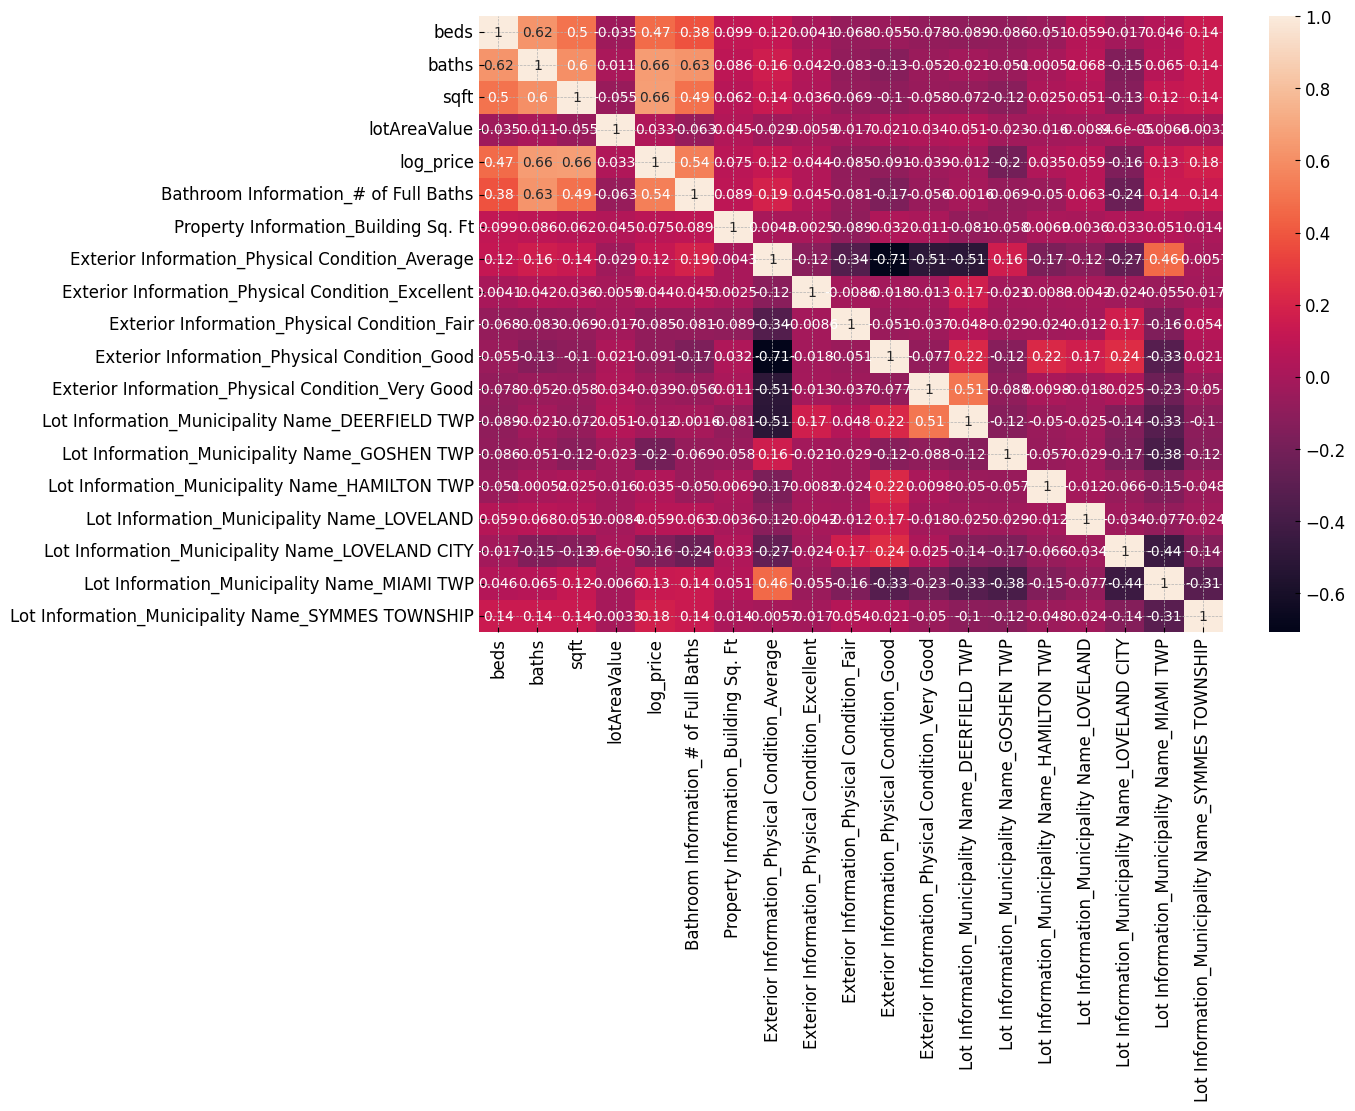

In [344]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(houses_filled_new_encoded_without_addr.corr(), annot=True, ax=ax)

**The features 'baths' and 'Bathroom Information_# of Full Baths' seem to be pretty highly correlated between each other, so I am going to drop 'Bathroom Information_# of Full Baths' so we can avoid multicollinearity**

In [345]:
houses_filled_new_encoded.drop(['Bathroom Information_# of Full Baths'], inplace=True, axis=1)

**Based on the correlations, I am also going to make a dataframe that only has features with a correlation over .1** 

In [346]:
houses_filled_new_encoded_2 = houses_filled_new_encoded.drop(['Property Information_Building Sq. Ft', 'Lot Information_Municipality Name_LOVELAND', 'Exterior Information_Physical Condition_Excellent', 'Lot Information_Municipality Name_HAMILTON TWP', 'lotAreaValue', 'Lot Information_Municipality Name_DEERFIELD TWP', 'Exterior Information_Physical Condition_Very Good', 'Exterior Information_Physical Condition_Fair', 'Exterior Information_Physical Condition_Good'], axis=1)

# Feature Engineering

**Selecting and transforming some of my raw data to see if it can improve my model. I've split it up into different dataframes so I can test different features out across different models**

**Dataframe 1**

In [273]:
selected_features = houses_filled_new_encoded[['sqft', 'baths', 'beds', 'log_price',
                                               'Lot Information_Municipality Name_SYMMES TOWNSHIP',
                                               'Lot Information_Municipality Name_MIAMI TWP',
                                               'Exterior Information_Physical Condition_Average',
                                               'Property Information_Building Sq. Ft',
                                               'Lot Information_Municipality Name_LOVELAND',
                                               'Exterior Information_Physical Condition_Excellent',
                                               'Lot Information_Municipality Name_HAMILTON TWP',
                                               'lotAreaValue',
                                               'Lot Information_Municipality Name_DEERFIELD TWP',
                                               'Exterior Information_Physical Condition_Very Good',
                                               'Exterior Information_Physical Condition_Fair',
                                               'Exterior Information_Physical Condition_Good',
                                               'Lot Information_Municipality Name_LOVELAND CITY',
                                               'Lot Information_Municipality Name_GOSHEN TWP']]

In [274]:
selected_features['sqft_beds_interaction'] = selected_features['sqft'] * selected_features['beds']
selected_features['sqft_Municipality_SYMMES_interaction'] = selected_features['sqft'] * selected_features['Lot Information_Municipality Name_SYMMES TOWNSHIP']
selected_features['sqft_Municipality_MIAMI_interaction'] = selected_features['sqft'] * selected_features['Lot Information_Municipality Name_MIAMI TWP']
selected_features['baths_Municipality_SYMMES_interaction'] = selected_features['baths'] * selected_features['Lot Information_Municipality Name_SYMMES TOWNSHIP']
selected_features['baths_Municipality_MIAMI_interaction'] = selected_features['baths'] * selected_features['Lot Information_Municipality Name_MIAMI TWP']

In [275]:
scaler = StandardScaler()

# Exclude 'log_price' as it's the target variable
features_to_scale = selected_features.drop('log_price', axis=1)
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_scale), columns=features_to_scale.columns)

# Add the 'log_price' column back to the DataFrame
scaled_features['log_price'] = selected_features['log_price']

In [277]:
interaction_features = ['sqft_beds_interaction', 'sqft_Municipality_SYMMES_interaction', 'sqft_Municipality_MIAMI_interaction',
                        'baths_Municipality_SYMMES_interaction', 'baths_Municipality_MIAMI_interaction']

# Append 'log_price' to the list of interaction features
interaction_features.append('log_price')

# Calculate the correlation between interaction features and 'log_price'
correlation = scaled_features[interaction_features].corr()

# Print the correlation
print(correlation['log_price'])

# Original features
correlations_org = houses_filled_new_encoded_without_addr.corr()['log_price']
correlations_org = correlations.sort_values(ascending=False)
print(correlations_org)

sqft_beds_interaction                   0.6727
sqft_Municipality_SYMMES_interaction    0.2269
sqft_Municipality_MIAMI_interaction     0.3620
baths_Municipality_SYMMES_interaction   0.2027
baths_Municipality_MIAMI_interaction    0.3482
log_price                               1.0000
Name: log_price, dtype: float64
log_price                                            1.0000
sqft                                                 0.6626
baths                                                0.6563
Bathroom Information_# of Full Baths                 0.5406
beds                                                 0.4722
Lot Information_Municipality Name_SYMMES TOWNSHIP    0.1775
Lot Information_Municipality Name_MIAMI TWP          0.1345
Exterior Information_Physical Condition_Average      0.1209
Property Information_Building Sq. Ft                 0.0748
Lot Information_Municipality Name_LOVELAND           0.0592
Exterior Information_Physical Condition_Excellent    0.0444
Lot Information_Municipali

**Dataframe 2**

In [347]:
selected_features = houses_filled_new_encoded[['sqft', 'baths', 'beds', 'log_price',
                                               'Lot Information_Municipality Name_SYMMES TOWNSHIP',
                                               'Lot Information_Municipality Name_MIAMI TWP',
                                               'Exterior Information_Physical Condition_Average',
                                               'Property Information_Building Sq. Ft',
                                               'Lot Information_Municipality Name_LOVELAND',
                                               'Exterior Information_Physical Condition_Excellent',
                                               'Lot Information_Municipality Name_HAMILTON TWP',
                                               'lotAreaValue',
                                               'Lot Information_Municipality Name_DEERFIELD TWP',
                                               'Exterior Information_Physical Condition_Very Good',
                                               'Exterior Information_Physical Condition_Fair',
                                               'Exterior Information_Physical Condition_Good',
                                               'Lot Information_Municipality Name_LOVELAND CITY',
                                               'Lot Information_Municipality Name_GOSHEN TWP']]

In [348]:
selected_features['sqft_beds_interaction'] = selected_features['sqft'] * selected_features['beds']
selected_features['sqft_Municipality_SYMMES_interaction'] = selected_features['sqft'] * selected_features['Lot Information_Municipality Name_SYMMES TOWNSHIP']
selected_features['sqft_Municipality_MIAMI_interaction'] = selected_features['sqft'] * selected_features['Lot Information_Municipality Name_MIAMI TWP']
selected_features['baths_Municipality_SYMMES_interaction'] = selected_features['baths'] * selected_features['Lot Information_Municipality Name_SYMMES TOWNSHIP']
selected_features['baths_Municipality_MIAMI_interaction'] = selected_features['baths'] * selected_features['Lot Information_Municipality Name_MIAMI TWP']

In [349]:
interaction_features = ['sqft_beds_interaction', 'sqft_Municipality_SYMMES_interaction', 'sqft_Municipality_MIAMI_interaction',
                        'baths_Municipality_SYMMES_interaction', 'baths_Municipality_MIAMI_interaction']

# Append 'log_price' to the list of interaction features
interaction_features.append('log_price')

# Calculate the correlation between interaction features and 'log_price'
correlation = scaled_features[interaction_features].corr()

# Print the correlation
print(correlation['log_price'])

# Original features
correlations_org = houses_filled_new_encoded_without_addr.corr()['log_price']
correlations_org = correlations.sort_values(ascending=False)
print(correlations_org)

sqft_beds_interaction                   0.6727
sqft_Municipality_SYMMES_interaction    0.2269
sqft_Municipality_MIAMI_interaction     0.3620
baths_Municipality_SYMMES_interaction   0.2027
baths_Municipality_MIAMI_interaction    0.3482
log_price                               1.0000
Name: log_price, dtype: float64
log_price                                            1.0000
sqft                                                 0.6626
baths                                                0.6563
Bathroom Information_# of Full Baths                 0.5406
beds                                                 0.4722
Lot Information_Municipality Name_SYMMES TOWNSHIP    0.1775
Lot Information_Municipality Name_MIAMI TWP          0.1345
Exterior Information_Physical Condition_Average      0.1209
Property Information_Building Sq. Ft                 0.0748
Lot Information_Municipality Name_LOVELAND           0.0592
Exterior Information_Physical Condition_Excellent    0.0444
Lot Information_Municipali

In [352]:
scaled_features_no_address = scaled_features.drop(['address', 'baths_Municipality_SYMMES_interaction',
                     'baths_Municipality_MIAMI_interaction',
                     'Lot Information_Municipality Name_SYMMES TOWNSHIP',
                     'Lot Information_Municipality Name_MIAMI TWP',
                     'Exterior Information_Physical Condition_Average',
                     'Property Information_Building Sq. Ft',
                     'Lot Information_Municipality Name_LOVELAND',
                     'Exterior Information_Physical Condition_Excellent',
                     'Lot Information_Municipality Name_HAMILTON TWP',
                     'lotAreaValue',
                     'Lot Information_Municipality Name_DEERFIELD TWP',
                     'Exterior Information_Physical Condition_Very Good',
                     'Exterior Information_Physical Condition_Fair',
                     'Exterior Information_Physical Condition_Good',
                     'Lot Information_Municipality Name_LOVELAND CITY',
                     'Lot Information_Municipality Name_GOSHEN TWP'], axis=1)

**Dataframe 3**

**I want to revisit our dataframe where I deleted the rows that had null values**

In [313]:
# Calculate the correlation of each feature with the log_price
corr = houses_filled.drop('address', axis=1).corr()['log_price']

corr_sorted = corr.sort_values(ascending=True)

print(corr)

beds           0.4722
baths          0.6563
sqft           0.6626
lotAreaValue   0.0334
log_price      1.0000
Name: log_price, dtype: float64


**New features**

In [321]:
houses_filled_new_encoded = houses_filled

# Create new features
houses_filled_new_encoded['bed_bath_ratio'] = houses_filled['beds'] / houses_filled['baths']
houses_filled_new_encoded['sqft_per_bed'] = houses_filled['sqft'] / houses_filled['beds']
houses_filled_new_encoded['sqft_per_bath'] = houses_filled['sqft'] / houses_filled['baths']
houses_filled_new_encoded['lot_size_per_sqft'] = houses_filled['lotAreaValue'] / houses_filled['sqft']

# Calculate the correlations with the log_price
correlations = houses_filled_new_encoded.drop('address', axis=1).corr()['log_price']
correlations = correlations.sort_values(ascending=False)
print(correlations)

log_price            1.0000
sqft                 0.6626
baths                0.6563
sqft_per_bed         0.5194
beds                 0.4722
sqft_per_bath        0.1210
lotAreaValue         0.0334
lot_size_per_sqft    0.0002
bed_bath_ratio      -0.4838
Name: log_price, dtype: float64


In [322]:
scaled_features['bed_bath_ratio'] = StandardScaler().fit_transform(houses_filled_new_encoded['bed_bath_ratio'].values.reshape(-1, 1))
scaled_features['sqft_per_bed'] = StandardScaler().fit_transform(houses_filled_new_encoded['sqft_per_bed'].values.reshape(-1, 1))
scaled_features['sqft_per_bath'] = StandardScaler().fit_transform(houses_filled_new_encoded['sqft_per_bath'].values.reshape(-1, 1))
scaled_features['lot_size_per_sqft'] = StandardScaler().fit_transform(houses_filled_new_encoded['lot_size_per_sqft'].values.reshape(-1, 1))

In [323]:
scaled_features_no_address = scaled_features.drop(['address', 'lot_size_per_sqft', 'sqft_per_bath', 'lotAreaValue'], axis=1)

# Model Training and Evaluation

**I'm trying a combination of different models on the different dataframes**

In [353]:
scaled_features['address'] = houses_filled_new_encoded['address']

# Drop the 'address' column from the scaled_features DataFrame
scaled_features_no_address = scaled_features.drop('address', axis=1)

X = scaled_features_no_address.drop('log_price', axis=1)
y = scaled_features_no_address['log_price']
addresses = houses_filled_new_encoded['address']

X_train, X_test, y_train, y_test, addresses_train, addresses_test = train_test_split(X, y, addresses, test_size=0.2, random_state=42)

**Dataframe 1**

In [287]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.1419555052480803
R-squared Score: 0.4894556373173047


In [288]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Decision Trees
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forests
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting Machines (GBMs)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

# Support Vector Machines (SVMs)
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

# XGBoost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)

# Neural Networks
nn = Sequential()
nn.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dense(25, activation='relu'))
nn.add(Dense(1))
nn.compile(optimizer='adam', loss='mean_squared_error')
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
nn_pred = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

5/5 [==============================] - 0s 2ms/step


In [289]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',
              'Decision Trees', 'Random Forests', 'Gradient Boosting Machines', 'Support Vector Machines',
              'XGBoost Regression', 'Neural Networks'],
    'MSE': [mse, ridge_mse, lasso_mse, elastic_net_mse, dt_mse, rf_mse, gbm_mse, svm_mse, xgb_reg_mse, nn_mse],
    'R-squared': [r2, ridge_r2, lasso_r2, elastic_net_r2, dt_r2, rf_r2, gbm_r2, svm_r2, xgb_reg_r2, nn_r2]
})

# Sort by MSE (Descending order)
sorted_results = results.sort_values(by='MSE', ascending=True)

# Display the sorted results in a tabular format
print(sorted_results.to_string(index=False))

                     Model    MSE  R-squared
            Random Forests 0.1294     0.5348
   Support Vector Machines 0.1348     0.5151
Gradient Boosting Machines 0.1382     0.5029
         Linear Regression 0.1420     0.4895
          Ridge Regression 0.1421     0.4890
        XGBoost Regression 0.1712     0.3842
            Decision Trees 0.2003     0.2795
           Neural Networks 0.2654     0.0453
          Lasso Regression 0.2796    -0.0057
    Elastic Net Regression 0.2796    -0.0057


**Dataframe 2**

In [354]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.13588833493228666
R-squared Score: 0.5112762746835764


In [355]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Decision Trees
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forests
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting Machines (GBMs)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

# Support Vector Machines (SVMs)
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

# XGBoost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)

# Neural Networks
nn = Sequential()
nn.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dense(25, activation='relu'))
nn.add(Dense(1))
nn.compile(optimizer='adam', loss='mean_squared_error')
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
nn_pred = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

5/5 [==============================] - 0s 2ms/step


In [356]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',
              'Decision Trees', 'Random Forests', 'Gradient Boosting Machines', 'Support Vector Machines',
              'XGBoost Regression', 'Neural Networks'],
    'MSE': [mse, ridge_mse, lasso_mse, elastic_net_mse, dt_mse, rf_mse, gbm_mse, svm_mse, xgb_reg_mse, nn_mse],
    'R-squared': [r2, ridge_r2, lasso_r2, elastic_net_r2, dt_r2, rf_r2, gbm_r2, svm_r2, xgb_reg_r2, nn_r2]
})

# Sort by MSE (Descending order)
sorted_results = results.sort_values(by='MSE', ascending=True)

# Display the sorted results in a tabular format
print(sorted_results.to_string(index=False))

                     Model    MSE  R-squared
            Random Forests 0.1308     0.5297
   Support Vector Machines 0.1345     0.5162
         Linear Regression 0.1359     0.5113
          Ridge Regression 0.1376     0.5053
Gradient Boosting Machines 0.1440     0.4820
            Decision Trees 0.1741     0.3738
        XGBoost Regression 0.1863     0.3298
          Lasso Regression 0.2796    -0.0057
    Elastic Net Regression 0.2796    -0.0057
           Neural Networks 0.3923    -0.4111


**Dataframe 3**

In [325]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.13588833493228666
R-squared Score: 0.5112762746835764


In [326]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Decision Trees
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forests
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting Machines (GBMs)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

# Support Vector Machines (SVMs)
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

# XGBoost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_pred = xgb_reg.predict(X_test)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_pred)
xgb_reg_r2 = r2_score(y_test, xgb_reg_pred)

# Neural Networks
nn = Sequential()
nn.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
nn.add(Dense(25, activation='relu'))
nn.add(Dense(1))
nn.compile(optimizer='adam', loss='mean_squared_error')
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
nn_pred = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

5/5 [==============================] - 0s 2ms/step


In [327]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',
              'Decision Trees', 'Random Forests', 'Gradient Boosting Machines', 'Support Vector Machines',
              'XGBoost Regression', 'Neural Networks'],
    'MSE': [mse, ridge_mse, lasso_mse, elastic_net_mse, dt_mse, rf_mse, gbm_mse, svm_mse, xgb_reg_mse, nn_mse],
    'R-squared': [r2, ridge_r2, lasso_r2, elastic_net_r2, dt_r2, rf_r2, gbm_r2, svm_r2, xgb_reg_r2, nn_r2]
})

# Sort by MSE (Descending order)
sorted_results = results.sort_values(by='MSE', ascending=True)

# Display the sorted results in a tabular format
print(sorted_results.to_string(index=False))

                     Model    MSE  R-squared
            Random Forests 0.1307     0.5299
   Support Vector Machines 0.1345     0.5162
         Linear Regression 0.1359     0.5113
          Ridge Regression 0.1376     0.5053
Gradient Boosting Machines 0.1428     0.4865
           Neural Networks 0.1755     0.3688
            Decision Trees 0.1784     0.3583
        XGBoost Regression 0.1863     0.3298
          Lasso Regression 0.2796    -0.0057
    Elastic Net Regression 0.2796    -0.0057


# Testing and Results

**Dataframe 1 using the Random Forests model resulted in the lowest MSE out of all of the different dataframes and models, so I will be using that model and dataframe below. I've given my Mom the Zillow link to these 5 houses without the sale price, so she is allowed to look at everything like where it is, how many bedrooms, bathrooms, etc.**

## House 1

![Alt text](House1.jpg)

**Mom's Guess: $519,000**

**Model's Guess: $427,760**

**Actual Price: $492,200**

**Pretty good guess Mom, 1-0**

## House 2

![Alt text](House2.jpg)

**Mom's Guess: $293,500**

**Model's Guess: $242,981**

**Actual Price: $257,000**

**Great guess from the model! 1-1**

## House 3

![Alt text](House3.jpg)

**Mom's Guess: $683,000**

**Model's Guess: $574,519**

**Actual Price: $550,000**

**Pretty good guess from the model, 1-2**

## House 4

![Alt text](House4.jpg)

**Mom's Guess: $305,000**

**Model's Guess: $215,590**

**Actual Price: $277,500**

**She brings it back! 2-2**

## House 5 - For All The Marbles

![Alt text](House5.jpg)

**Mom's Guess: $297,600**

**Model's Guess: $344,762**

**Actual Price: $300,000**

**The old woman still has it! 3-2 my mom**

### Here is the actual code I ran to produce the results of our experiment

In [271]:
# Get the indices of the test set
test_indices = X_test.index.values

# Choose three random indices
random_indices = random.sample(list(test_indices), 5)

# Get the features and prices of the three random houses
X_random = X_test.loc[random_indices]
y_random = y_test.loc[random_indices]

# Get the predicted prices using the random forest model
rf_random_pred = rf.predict(X_random)

# Print the actual and predicted prices of the three random houses
for i, index in enumerate(random_indices):
    print(f"House {i+1}:")
    print(f"Address: {addresses_test[index]}")
    if index in y_test.index:
        print(f"Actual Price: {np.exp(y_random.loc[index])}")
    else:
        print("Actual price not available.")
    print(f"Predicted Price: {np.exp(rf_random_pred[i])}")
    print()


House 1:
Address: 11950 Fallcreek Ln, Loveland, OH 45140
Actual Price: 492199.9999999996
Predicted Price: 427759.5468253093

House 2:
Address: 813 Kenmar Dr, Loveland, OH 45140
Actual Price: 256999.9999999998
Predicted Price: 242981.37885600957

House 3:
Address: 6135 Kilrenny Dr, Loveland, OH 45140
Actual Price: 550000.0000000001
Predicted Price: 574519.1932271429

House 4:
Address: 9370 Arnold Ln, Symmes Township, OH 45140
Actual Price: 277499.9999999999
Predicted Price: 215589.77071644212

House 5:
Address: 1343 Miracle Ln, Loveland, OH 45140
Actual Price: 299999.9999999999
Predicted Price: 344762.43469848036



## Reflection

**This was a fun experiment. I was able to learn a lot of different things and compile and end-to-end machine learning project. With more time, I think this project could really develop and the final model could become really good. I would've liked to include more location data like using lat/lon to map out neighborhoods/subdivisions. There are so many different possiblites and that is why this is such an iterative process. This was a great starter project for me and I hope to continue development on it.**

In [360]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 54856 bytes to source.py
